# xxxx_blank.csvの日付の確認

In [1]:
import pandas as pd

In [2]:
!ls ../data/raw/warranty_fcok/dbhaa0001_tbhaa0006_blank/

dbhaa0001_process_blank.csv tbhaa0006_fcok_blank.csv


## ワランティデータ

In [52]:
warranty = pd.read_csv("../data/raw/warranty_fcok/dbhaa0001_tbhaa0006_blank/dbhaa0001_process_blank.csv",
                      dtype={"W_FAILURE_DATE":object}) # W_FAILURE_DATEは文字列(object型)で読み込む

/Users/localadmin/anaconda3/envs/suzuki/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,9,11,12,13,14,18,20,28,29,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [53]:
warranty.head()

,W_KEY,W_BASE_CD,W_PROD_BASE_CD,W_FIELD_CLAIM_DIV,W_PROD_DIV,W_DMEX_DIV,W_PROCESS_MONTH,W_DIST_CD,W_DIST_COUNTRY_CD,W_DIST_ISSUE_NO,...,W_SUBLET_AMT,W_SHIPPING_AMT,W_TOTAL_AMT,W_CFC_COMPANY_CD,W_CFC_RATE,W_CFC_AMT,W_FC_TO_FAILURE,W_SALES_TO_FAILURE,W_SB_NO,W_CRT_TIME_STAMP
0,WRJPJP200011B005552,100100,100100,1,B,0,200011,40218,JP,NaN,...,0,0,3896,3187,50,1552,21,21,NaN,17-06-16 09:47:36.365376000
1,WRJPJP200011B005553,100100,100100,1,B,0,200011,40311,JP,NaN,...,0,0,3897,3438,59,1479,37,37,NaN,17-06-16 09:47:36.370799000
2,WRJPJP200011B005554,100100,100100,1,B,0,200011,40710,JP,NaN,...,0,0,3900,3059,0,0,36,36,NaN,17-06-16 09:47:36.372699000
3,WRJPJP200011B005555,100100,100100,1,B,0,200011,60303,JP,NaN,...,0,0,3900,3215,54,1221,11,11,NaN,17-06-16 09:47:36.375736000
4,WRJPJP200011B005556,100100,100100,1,B,0,200011,70117,JP,NaN,...,0,0,3900,3663,0,0,36,37,NaN,17-06-16 09:47:36.377282000


In [54]:
df_blank_failure_date_counts = warranty.W_FAILURE_DATE.value_counts()
df_blank_failure_date_counts.head()

20020930    5126
20010625    4478
20010620    4405
20020228    4333
20140509    4305
Name: W_FAILURE_DATE, dtype: int64

In [55]:
df_blank_failure_date_counts.sort_index().head()

00000000    3448
13031900       1
13040300       1
19971106       1
19971213       1
Name: W_FAILURE_DATE, dtype: int64

"00000000", "13031900", "13040300"のエラー入力があった

In [7]:
%matplotlib inline

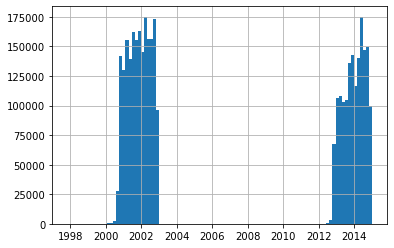

In [56]:
pd.to_datetime(warranty.W_FAILURE_DATE.astype(str), errors="coerce").hist(bins=100)

2000/9 ~ 2002/12, 2012/11 ~ 2014/12が支配的

In [57]:
warranty["month"] = warranty.W_FAILURE_DATE.astype(str).str[:6]

In [58]:
# with句の中のみ、1000列表示する(pythonでは'コンテクスト'と呼ばれる)
with pd.option_context("display.max_rows", 1000):
    display(warranty.groupby("month")["W_KEY"].apply(len).sort_index())

month
000000     3448
130319        1
130403        1
199711        1
199712        1
199804        1
199805        2
199806        2
199807        1
199808        1
199810        2
199811        2
199812        7
199901       12
199902        7
199903       15
199904       17
199905       24
199906       22
199907       22
199908       50
199909       57
199910       68
199911       84
199912       79
200001      139
200002      175
200003      187
200004      239
200005      351
200006      516
200007     1719
200008     2937
200009    18536
200010    59319
200011    71515
200012    67486
200101    64411
200102    64092
200103    82530
200104    66265
200105    68342
200106    80130
200107    81468
200108    72685
200109    73222
200110    79054
200111    78722
200112    75328
200201    73955
200202    71618
200203    87204
200204    80209
200205    77174
200206    77218
200207    79158
200208    77981
200209    85661
200210    80452
200211    63590
200212    17881
200303        1
20

0の他は、怪しい値はない

blank以外(既存受領分全てのデータ)のエラー値を確認

In [38]:
from sqlalchemy import create_engine

In [39]:
import pathlib
PATH_DB = pathlib.Path("../data/interim/suzuki_phase2_db.sqlite3")

In [40]:
engine = create_engine("sqlite:///" + PATH_DB.as_posix())

In [59]:
df_failure_month_count = pd.read_sql(
"""
select
    substr(W_FAILURE_DATE, 1, 6) as month
    ,count(*) as n 
from dbhaa_all
group by month
;
""", engine)

In [60]:
df_failure_month_count.shape

(330, 2)

In [64]:
with pd.option_context("display.max_rows", 1000):
    display(df_failure_month_count.sort_values(by="month"))

,month,n
0,000000,16144
1,000001,5
2,000003,1
3,000008,1
4,000009,1
5,000010,136
6,000011,4
7,000012,5
8,000013,5
9,000014,4


In [80]:
print((df_failure_month_count
 .loc[df_failure_month_count.month.astype(int) < 190000,"n"]
 .sum()), "件のエラーデータ")

16380 件のエラーデータ


エラーのデータの中身

In [84]:
with pd.option_context("display.max_columns", 1000):
    display(warranty[warranty.month == "000000"].head())

,W_KEY,W_BASE_CD,W_PROD_BASE_CD,W_FIELD_CLAIM_DIV,W_PROD_DIV,W_DMEX_DIV,W_PROCESS_MONTH,W_DIST_CD,W_DIST_COUNTRY_CD,W_DIST_ISSUE_NO,W_SHOP_DIV,W_SHOP_CD,W_DIV1,W_DIV2,W_DIV3,W_FIXED_DIV,W_MINUS_DIV,W_SRC_DIV,W_SRC_KEY,W_VIN,W_FCOK,W_PROD_MODEL_CD,W_SALES_DATE,W_FAILURE_DATE,W_MILEAGE_DIV,W_MILEAGE,W_CAUSAL_PART_NO,W_TROUBLE_CC,W_TROUBLE_CP,W_TROUBLE_DF,W_TROUBLE_MP,W_DTC_1,W_DTC_2,W_OPERATION_CD,W_PARTS_AMT,W_LABOR_HOUR,W_LABOR_AMT,W_SUBLET_HOUR,W_SUBLET_AMT,W_SHIPPING_AMT,W_TOTAL_AMT,W_CFC_COMPANY_CD,W_CFC_RATE,W_CFC_AMT,W_FC_TO_FAILURE,W_SALES_TO_FAILURE,W_SB_NO,W_CRT_TIME_STAMP,month
3163596,WRXXIN201212B000205,123500,123500,1,B,1,201212,8064,XX,B1211187,NaN,NaN,NaN,0,0,1,1,2,2012128064B0B1211187,MA3GFC31S00536207,20120615,YC5,20121025,00000000,K,0,99611-60A01,NaN,83,29,NaN,NaN,NaN,QG9999,2966,0.5,1125,0.0,0,1779,5871,3570,0,0,0,0,NaN,17-06-20 15:53:27.414080000,000000
3163758,WRXXIN201212B001328,123500,123500,1,B,1,201212,8166,XX,12010970,NaN,NaN,NaN,0,0,1,1,2,2012128166B012010970,MA3GXB72SC0368511,20120202,YV4,20121010,00000000,K,0,03141-0512A,NaN,84,22,NaN,NaN,NaN,TB09R0,12,3.5,3087,0.0,0,9,3108,3570,0,0,0,0,NaN,17-06-20 15:53:30.165131000,000000
3163762,WRXXIN201212B001332,123500,123500,1,B,1,201212,8166,XX,12011734,NaN,NaN,NaN,0,0,1,1,2,2012128166B012011734,MA3GXB72SC0385976,20120413,YV4,20121028,00000000,K,0,12341M68K00-0B0,NaN,84,35,NaN,NaN,NaN,AE03R2,11808,11.4,352,0.0,0,9092,21252,3570,0,0,0,0,NaN,17-06-20 15:53:30.174865000,000000
3163785,WRXXIN201212B001616,123500,123500,1,B,1,201212,8202,XX,12060057,NaN,NaN,NaN,0,0,1,1,2,2012128202B012060057,MA3GFC31S00476082,20111122,YC511B22,20120606,00000000,K,0,71811M68K00-799,NaN,65,61,NaN,NaN,NaN,NA9999,0,0.0,0,9.3,47076,0,47076,3570,0,0,0,0,NaN,17-06-20 15:53:31.017600000,000000
3163954,WRXXIN201212B003960,123500,123500,1,B,1,201212,8212,XX,12110745,NaN,NaN,NaN,0,0,1,1,2,2012128212B012110745,MA3GFC31S00517370,20120307,YC5,20121114,00000000,K,0,48500M68K70,NaN,51,48,NaN,NaN,NaN,LJ9999,0,0.5,4210,0.0,0,0,4210,3570,0,0,0,0,NaN,17-06-20 15:53:37.049392000,000000


## 生産データ

In [85]:
fcok = pd.read_csv("../data/raw/warranty_fcok/dbhaa0001_tbhaa0006_blank/tbhaa0006_fcok_blank.csv",
                  dtype={"V_FCOK":object}) # V_FCOKは文字列(object型)で読み込む

/Users/localadmin/anaconda3/envs/suzuki/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5,6,15,17,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


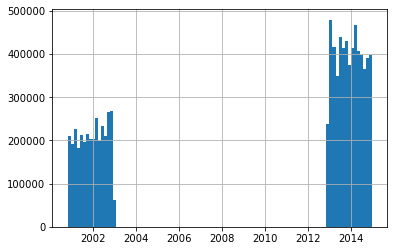

In [86]:
pd.to_datetime(fcok.V_FCOK.astype(str)).hist(bins=100)

2000/11 ~ 2002/12, 2013/01 ~ 2014/12

In [87]:
fcok["month"] = fcok.V_FCOK.astype(str).str[:6]

In [89]:
with pd.option_context("display.max_rows", 1000):
    display(fcok.month.value_counts().sort_index())

200011    108381
200012    127813
200101    116614
200102    127079
200103    127910
200104    114328
200105    110317
200106    120124
200107    132429
200108    104953
200109    137910
200110    114060
200111    117033
200112    115049
200201    120145
200202    138999
200203    149212
200204    121586
200205    121050
200206    136797
200207    139939
200208    115461
200209    155648
200210    155634
200211    155859
200212    146821
201212    218230
201301    259920
201302    260455
201303    223198
201304    233567
201305    218692
201306    244159
201307    260400
201308    225568
201309    269562
201310    259268
201311    249766
201312    212511
201401    239326
201402    234019
201403    269812
201404    248685
201405    239569
201406    247089
201407    233269
201408    189388
201409    242973
201410    240232
201411    233673
201412    225799
Name: month, dtype: int64

生産データには怪しい値はない